In [2]:
# Qsurface imports
from qsurface.main import create_phenomenological_toric_superoperator, create_phenomenological_weight_3_toric_superoperator,create_phenomenological_weight_4_toric_superoperator, initialize, run, BenchmarkDecoder, run_multiprocess_superoperator


# Interactive plotting imports
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.util.compiler import TypeScript

# Plotting imports
import matplotlib.pyplot as plt

# Math imports
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

# Utilities import
from os import listdir
from os.path import isfile, join
from itertools import permutations
import timeit
import time


%load_ext line_profiler

## Weight-3 CASES!

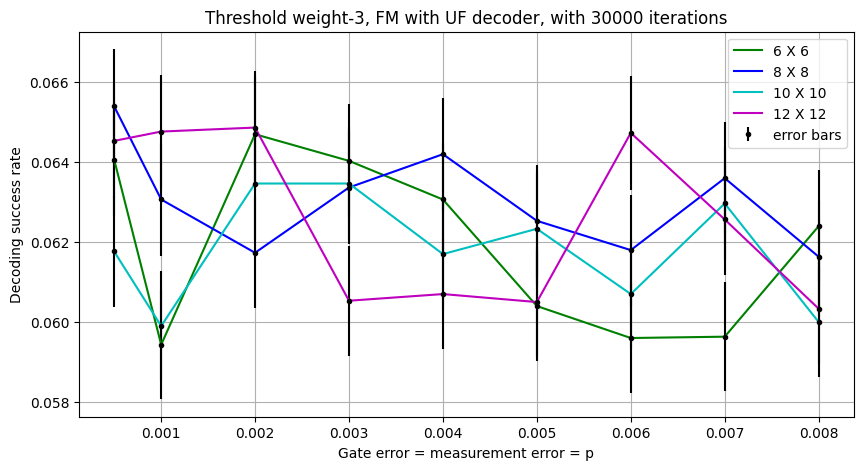

In [24]:
iterations = 30000

# first data first trial
# data = {"(6, 6)":{"0":[0.0005,0.8805],"1":[0.001,0.9021666667],"2":[0.00125,0.8899],"3":[0.0015,0.8828],"4":[0.00175,0.8712666667],"5":[0.002,0.8555333333]},"(8, 8)":{"0":[0.0005,0.8883333333],"1":[0.001,0.9141333333],"2":[0.00125,0.9015333333],"3":[0.0015,0.8870333333],"4":[0.00175,0.8694],"5":[0.002,0.8522]},"(10, 10)":{"0":[0.0005,0.8905333333],"1":[0.001,0.9211333333],"2":[0.00125,0.9063],"3":[0.0015,0.8890666667],"4":[0.00175,0.8681666667],"5":[0.002,0.8481666667]},"(12, 12)":{"0":[0.0005,0.8912666667],"1":[0.001,0.9265666667],"2":[0.00125,0.9094666667],"3":[0.0015,0.8891],"4":[0.00175,0.8639333333],"5":[0.002,0.8402333333]}}

# second data first trial with blossomV
# data = {"(6, 6)":{"0":[0.0005,0.8813666667],"1":[0.001,0.9024],"2":[0.00125,0.8972666667],"3":[0.0015,0.8812333333],"4":[0.00175,0.8690666667],"5":[0.002,0.8572666667]},"(8, 8)":{"0":[0.0005,0.8872],"1":[0.001,0.9156],"2":[0.00125,0.9028666667],"3":[0.0015,0.8878333333],"4":[0.00175,0.8729666667],"5":[0.002,0.8556666667]},"(10, 10)":{"0":[0.0005,0.8903],"1":[0.001,0.9224],"2":[0.00125,0.9032333333],"3":[0.0015,0.892],"4":[0.00175,0.8701333333],"5":[0.002,0.8511666667]},"(12, 12)":{"0":[0.0005,0.8882666667],"1":[0.001,0.9282],"2":[0.00125,0.9076333333],"3":[0.0015,0.8882333333],"4":[0.00175,0.8629],"5":[0.002,0.8433]}}

# after correction!
# data = {"(6, 6)":{"0":[0.0005,0.8525333333],"1":[0.001,0.8799],"2":[0.00125,0.8670666667],"3":[0.0015,0.8544333333],"4":[0.00175,0.8380666667],"5":[0.002,0.8306333333]},"(8, 8)":{"0":[0.0005,0.8389],"1":[0.001,0.8786666667],"2":[0.00125,0.8635666667],"3":[0.0015,0.8420333333],"4":[0.00175,0.8318],"5":[0.002,0.8135333333]},"(10, 10)":{"0":[0.0005,0.8188666667],"1":[0.001,0.8766666667],"2":[0.00125,0.8529333333],"3":[0.0015,0.8347],"4":[0.00175,0.8108],"5":[0.002,0.7883666667]},"(12, 12)":{"0":[0.0005,0.7994],"1":[0.001,0.8660333333],"2":[0.00125,0.8427],"3":[0.0015,0.8170333333],"4":[0.00175,0.7868333333],"5":[0.002,0.7593333333]}}

#new one!
# data = {"(6, 6)":{"0":[0.0005,0.8494666667],"1":[0.001,0.8802333333],"2":[0.00125,0.8683333333],"3":[0.0015,0.8555666667],"4":[0.00175,0.8426666667],"5":[0.002,0.8286666667]},"(8, 8)":{"0":[0.0005,0.8414333333],"1":[0.001,0.8795666667],"2":[0.00125,0.8616333333],"3":[0.0015,0.8456],"4":[0.00175,0.8283333333],"5":[0.002,0.8112333333]},"(10, 10)":{"0":[0.0005,0.8190333333],"1":[0.001,0.8678],"2":[0.00125,0.8537],"3":[0.0015,0.8324],"4":[0.00175,0.8074333333],"5":[0.002,0.7852333333]},"(12, 12)":{"0":[0.0005,0.8008],"1":[0.001,0.8646666667],"2":[0.00125,0.8407],"3":[0.0015,0.8145666667],"4":[0.00175,0.7875],"5":[0.002,0.7576333333]}}

# data for protocol 351 TESTING PHASE FOR WEIGHT 3
# data = {"(6, 6)":{"0":[0.001,0.8828333333],"1":[0.00105,0.8798],"2":[0.0011,0.8671333333],"3":[0.00115,0.8643333333],"4":[0.0012,0.8565333333],"5":[0.00125,0.8514666667],"6":[0.0013,0.8409666667],"7":[0.00135,0.8718666667],"8":[0.0014,0.8679],"9":[0.00145,0.8624]},"(8, 8)":{"0":[0.001,0.8868333333],"1":[0.00105,0.8752666667],"2":[0.0011,0.8656666667],"3":[0.00115,0.8619666667],"4":[0.0012,0.8496],"5":[0.00125,0.8386333333],"6":[0.0013,0.8323],"7":[0.00135,0.8709],"8":[0.0014,0.8626],"9":[0.00145,0.8527]},"(10, 10)":{"0":[0.001,0.8811333333],"1":[0.00105,0.872],"2":[0.0011,0.8617333333],"3":[0.00115,0.8497],"4":[0.0012,0.8378],"5":[0.00125,0.8202],"6":[0.0013,0.8121666667],"7":[0.00135,0.8670666667],"8":[0.0014,0.8536666667],"9":[0.00145,0.8469]},"(12, 12)":{"0":[0.001,0.8804666667],"1":[0.00105,0.8657333333],"2":[0.0011,0.8497666667],"3":[0.00115,0.8332],"4":[0.0012,0.8236],"5":[0.00125,0.8098333333],"6":[0.0013,0.7896333333],"7":[0.00135,0.8613],"8":[0.0014,0.8488333333],"9":[0.00145,0.8318333333]}}

# data for protocol 351 TESTING AFTER REMOVING IDLING NOISE TO CHECK THE TREND
# data = {"(6, 6)":{"0":[0.001,0.9685],"1":[0.00105,0.9649333333],"2":[0.0011,0.9628],"3":[0.00115,0.9581],"4":[0.0012,0.9565666667],"5":[0.00125,0.9483666667],"6":[0.0013,0.9454333333],"7":[0.00135,0.94],"8":[0.0014,0.9353333333],"9":[0.00145,0.9300333333]},"(8, 8)":{"0":[0.001,0.9784333333],"1":[0.00105,0.9784666667],"2":[0.0011,0.9739333333],"3":[0.00115,0.9704666667],"4":[0.0012,0.9671333333],"5":[0.00125,0.9658],"6":[0.0013,0.9582333333],"7":[0.00135,0.9551666667],"8":[0.0014,0.9513666667],"9":[0.00145,0.9479]},"(10, 10)":{"0":[0.001,0.9875],"1":[0.00105,0.9834],"2":[0.0011,0.9820666667],"3":[0.00115,0.9803666667],"4":[0.0012,0.9761333333],"5":[0.00125,0.9731],"6":[0.0013,0.9709333333],"7":[0.00135,0.9652],"8":[0.0014,0.9603666667],"9":[0.00145,0.9566]},"(12, 12)":{"0":[0.001,0.9909333333],"1":[0.00105,0.9898333333],"2":[0.0011,0.9883333333],"3":[0.00115,0.9860666667],"4":[0.0012,0.9836333333],"5":[0.00125,0.9806666667],"6":[0.0013,0.9765333333],"7":[0.00135,0.9722],"8":[0.0014,0.9670333333],"9":[0.00145,0.9633333333]}}

# data for protocol 351 TESTING WITH ONLY IDLING NOISE
# data = {"(6, 6)":{"0":[0.001,0.9922333333],"1":[0.00105,0.9927666667],"2":[0.0011,0.9923],"3":[0.00115,0.9928333333],"4":[0.0012,0.9928333333],"5":[0.00125,0.9928333333],"6":[0.0013,0.9930666667],"7":[0.00135,0.996],"8":[0.0014,0.9964666667],"9":[0.00145,0.9966666667]},"(8, 8)":{"0":[0.001,0.9963333333],"1":[0.00105,0.9966],"2":[0.0011,0.9965],"3":[0.00115,0.9968],"4":[0.0012,0.9969333333],"5":[0.00125,0.9964666667],"6":[0.0013,0.9962666667],"7":[0.00135,0.998],"8":[0.0014,0.9979333333],"9":[0.00145,0.9978666667]},"(10, 10)":{"0":[0.001,0.9978666667],"1":[0.00105,0.9980666667],"2":[0.0011,0.9978666667],"3":[0.00115,0.9980333333],"4":[0.0012,0.9981],"5":[0.00125,0.9978666667],"6":[0.0013,0.9977333333],"7":[0.00135,0.9982666667],"8":[0.0014,0.9983666667],"9":[0.00145,0.9983666667]},"(12, 12)":{"0":[0.001,0.9983666667],"1":[0.00105,0.9983333333],"2":[0.0011,0.9982],"3":[0.00115,0.9983],"4":[0.0012,0.9982666667],"5":[0.00125,0.9982333333],"6":[0.0013,0.9982666667],"7":[0.00135,0.9983333333],"8":[0.0014,0.9983666667],"9":[0.00145,0.9983666667]}}

# data for protocol 351 TESTING AFTER CORRECTION
# data = {"(6, 6)":{"0":[0.001225,0.8832333333],"1":[0.00125,0.867],"2":[0.001275,0.8668],"3":[0.0013,0.8592333333],"4":[0.001325,0.8755],"5":[0.00135,0.8698],"6":[0.001375,0.8681666667],"7":[0.0014,0.8654333333]},"(8, 8)":{"0":[0.001225,0.8940333333],"1":[0.00125,0.8635],"2":[0.001275,0.8582333333],"3":[0.0013,0.8552666667],"4":[0.001325,0.8717666667],"5":[0.00135,0.8727],"6":[0.001375,0.8623],"7":[0.0014,0.8591]},"(10, 10)":{"0":[0.001225,0.8928333333],"1":[0.00125,0.8555333333],"2":[0.001275,0.8507666667],"3":[0.0013,0.8426],"4":[0.001325,0.8681333333],"5":[0.00135,0.8636333333],"6":[0.001375,0.8580666667],"7":[0.0014,0.8549666667]},"(12, 12)":{"0":[0.001225,0.8874],"1":[0.00125,0.8473333333],"2":[0.001275,0.8400333333],"3":[0.0013,0.8279666667],"4":[0.001325,0.8652666667],"5":[0.00135,0.8594333333],"6":[0.001375,0.8485666667],"7":[0.0014,0.8413]}}

# data after high number of iterations from Sebastian
# data = {"(6, 6)":{"0":[0.001225,0.8603666667],"1":[0.00125,0.8592333333],"2":[0.001275,0.8557333333],"3":[0.0013,0.8532333333],"4":[0.001325,0.8492],"5":[0.00135,0.8440666667],"6":[0.0014,0.8392333333]},"(8, 8)":{"0":[0.001225,0.8578],"1":[0.00125,0.8532],"2":[0.001275,0.8474666667],"3":[0.0013,0.8415],"4":[0.001325,0.8359333333],"5":[0.00135,0.8329666667],"6":[0.0014,0.8236333333]},"(10, 10)":{"0":[0.001225,0.8466666667],"1":[0.00125,0.8419666667],"2":[0.001275,0.8395],"3":[0.0013,0.8309666667],"4":[0.001325,0.8245666667],"5":[0.00135,0.8101333333],"6":[0.0014,0.7999333333]},"(12, 12)":{"0":[0.001225,0.8401],"1":[0.00125,0.8274333333],"2":[0.001275,0.8226],"3":[0.0013,0.8140666667],"4":[0.001325,0.8039333333],"5":[0.00135,0.7953],"6":[0.0014,0.7782]}}


## 80 data
# data = {"(6, 6)":{"0":[0.0005,0.9982666667],"1":[0.001001,0.998],"2":[0.002,0.9927],"3":[0.003,0.9872],"4":[0.004,0.9761666667],"5":[0.005,0.9553],"6":[0.006,0.9231333333],"7":[0.007,0.8721666667]},"(8, 8)":{"0":[0.0005,0.9984],"1":[0.001001,0.9983666667],"2":[0.002,0.9968333333],"3":[0.003,0.9939],"4":[0.004,0.9889],"5":[0.005,0.9692666667],"6":[0.006,0.9356],"7":[0.007,0.8773666667]},"(10, 10)":{"0":[0.0005,0.9984],"1":[0.001001,0.9984],"2":[0.002,0.9976666667],"3":[0.003,0.9968666667],"4":[0.004,0.9930666667],"5":[0.005,0.9805333333],"6":[0.006,0.9452],"7":[0.007,0.8778333333]},"(12, 12)":{"0":[0.0005,0.9984],"1":[0.001001,0.9983666667],"2":[0.002,0.9982666667],"3":[0.003,0.9979333333],"4":[0.004,0.996],"5":[0.005,0.9870333333],"6":[0.006,0.9555333333],"7":[0.007,0.8825666667]}}

## 81 data
# data = {"(6, 6)":{"0":[0.0005,0.0626],"1":[0.001001,0.0628666667],"2":[0.002,0.0612333333],"3":[0.003,0.0633666667],"4":[0.004,0.0638],"5":[0.005,0.0626666667],"6":[0.006,0.0657],"7":[0.007,0.0641666667],"8":[0.008,0.0615]},"(8, 8)":{"0":[0.0005,0.0633333333],"1":[0.001001,0.0627],"2":[0.002,0.0624],"3":[0.003,0.0620333333],"4":[0.004,0.0624],"5":[0.005,0.0615666667],"6":[0.006,0.0632],"7":[0.007,0.0621],"8":[0.008,0.0609666667]},"(10, 10)":{"0":[0.0005,0.0632666667],"1":[0.001001,0.0626333333],"2":[0.002,0.0629333333],"3":[0.003,0.0649],"4":[0.004,0.0622],"5":[0.005,0.0635],"6":[0.006,0.0601666667],"7":[0.007,0.0611666667],"8":[0.008,0.0628333333]},"(12, 12)":{"0":[0.0005,0.0635666667],"1":[0.001001,0.0619],"2":[0.002,0.0614333333],"3":[0.003,0.0624],"4":[0.004,0.0625666667],"5":[0.005,0.0624666667],"6":[0.006,0.0629333333],"7":[0.007,0.0622666667],"8":[0.008,0.0626666667]}}

## 82 data
# data = {"(6, 6)":{"0":[0.0005,0.9097333333],"1":[0.001001,0.9203],"2":[0.002,0.8792666667],"3":[0.003,0.8295],"4":[0.004,0.7651],"5":[0.005,0.6981],"6":[0.006,0.6201333333],"7":[0.007,0.545],"8":[0.008,0.4751666667]},"(8, 8)":{"0":[0.0005,0.9189],"1":[0.001001,0.9281666667],"2":[0.002,0.8771333333],"3":[0.003,0.808],"4":[0.004,0.7224333333],"5":[0.005,0.6217333333],"6":[0.006,0.5210666667],"7":[0.007,0.4244666667],"8":[0.008,0.337]},"(10, 10)":{"0":[0.0005,0.9209666667],"1":[0.001001,0.9357],"2":[0.002,0.8752666667],"3":[0.003,0.7796666667],"4":[0.004,0.6684333333],"5":[0.005,0.5403333333],"6":[0.006,0.4205],"7":[0.007,0.3159666667],"8":[0.008,0.2321666667]},"(12, 12)":{"0":[0.0005,0.9242333333],"1":[0.001001,0.9413666667],"2":[0.002,0.8629666667],"3":[0.003,0.7539333333],"4":[0.004,0.6127],"5":[0.005,0.4633],"6":[0.006,0.3330666667],"7":[0.007,0.2388],"8":[0.008,0.1674666667]}}

## 83 data
# data = {"(6, 6)":{"0":[0.0005,0.0616666667],"1":[0.001001,0.0640333333],"2":[0.002,0.0620666667],"3":[0.003,0.0615],"4":[0.004,0.061],"5":[0.005,0.0643],"6":[0.006,0.0613333333],"7":[0.007,0.0618],"8":[0.008,0.0612333333]},"(8, 8)":{"0":[0.0005,0.0620666667],"1":[0.001001,0.0620666667],"2":[0.002,0.0614333333],"3":[0.003,0.0604666667],"4":[0.004,0.0629],"5":[0.005,0.0646333333],"6":[0.006,0.0619333333],"7":[0.007,0.0643333333],"8":[0.008,0.0632]},"(10, 10)":{"0":[0.0005,0.0631],"1":[0.001001,0.0626333333],"2":[0.002,0.0616333333],"3":[0.003,0.0620666667],"4":[0.004,0.0630666667],"5":[0.005,0.0613666667],"6":[0.006,0.0631666667],"7":[0.007,0.0622333333],"8":[0.008,0.0621]},"(12, 12)":{"0":[0.0005,0.0633666667],"1":[0.001001,0.0638333333],"2":[0.002,0.0629],"3":[0.003,0.0610666667],"4":[0.004,0.0616],"5":[0.005,0.0638],"6":[0.006,0.0614],"7":[0.007,0.0612333333],"8":[0.008,0.0649]}}

## 84 data
# data = {"(6, 6)":{"0":[0.0005,0.7122333333],"1":[0.001001,0.6773333333],"2":[0.002,0.6113],"3":[0.003,0.5437333333],"4":[0.004,0.4809333333],"5":[0.005,0.4177666667],"6":[0.006,0.3613333333],"7":[0.007,0.3087],"8":[0.008,0.2666666667]},"(8, 8)":{"0":[0.0005,0.6378666667],"1":[0.001001,0.5914333333],"2":[0.002,0.5093],"3":[0.003,0.4243333333],"4":[0.004,0.3526666667],"5":[0.005,0.2927],"6":[0.006,0.2345666667],"7":[0.007,0.1912666667],"8":[0.008,0.1572]},"(10, 10)":{"0":[0.0005,0.5553333333],"1":[0.001001,0.5034666667],"2":[0.002,0.4080666667],"3":[0.003,0.328],"4":[0.004,0.2685666667],"5":[0.005,0.2164666667],"6":[0.006,0.1740333333],"7":[0.007,0.1407],"8":[0.008,0.1132]},"(12, 12)":{"0":[0.0005,0.4710333333],"1":[0.001001,0.4147],"2":[0.002,0.3337333333],"3":[0.003,0.2705333333],"4":[0.004,0.2235333333],"5":[0.005,0.1790333333],"6":[0.006,0.1412],"7":[0.007,0.1097333333],"8":[0.008,0.0877666667]}}

## 60 data
# data = {"(6, 6)":{"0":[0.0005,0.8661666667],"1":[0.001001,0.842],"2":[0.002,0.7872],"3":[0.003,0.7253666667],"4":[0.004,0.6563666667],"5":[0.005,0.5808],"6":[0.006,0.5071666667],"7":[0.007,0.4344],"8":[0.008,0.3745]},"(8, 8)":{"0":[0.0005,0.8621],"1":[0.001001,0.8273],"2":[0.002,0.7488333333],"3":[0.003,0.6595666667],"4":[0.004,0.5599666667],"5":[0.005,0.4606333333],"6":[0.006,0.3775],"7":[0.007,0.3014666667],"8":[0.008,0.2379]},"(10, 10)":{"0":[0.0005,0.8472],"1":[0.001001,0.8037333333],"2":[0.002,0.7016],"3":[0.003,0.5858],"4":[0.004,0.4708333333],"5":[0.005,0.3621],"6":[0.006,0.2797666667],"7":[0.007,0.2096666667],"8":[0.008,0.163]},"(12, 12)":{"0":[0.0005,0.8344333333],"1":[0.001001,0.7813666667],"2":[0.002,0.6466333333],"3":[0.003,0.5121],"4":[0.004,0.3876],"5":[0.005,0.2912],"6":[0.006,0.2177666667],"7":[0.007,0.1574666667],"8":[0.008,0.1185666667]}}

## 61 data
# data = {"(6, 6)":{"0":[0.0005,0.0616333333],"1":[0.001001,0.0624333333],"2":[0.002,0.0641333333],"3":[0.003,0.0629333333],"4":[0.004,0.0627],"5":[0.005,0.0633666667],"6":[0.006,0.0618],"7":[0.007,0.0642],"8":[0.008,0.0636333333]},"(8, 8)":{"0":[0.0005,0.0644],"1":[0.001001,0.0603333333],"2":[0.002,0.0614333333],"3":[0.003,0.0596333333],"4":[0.004,0.0623666667],"5":[0.005,0.0653666667],"6":[0.006,0.0634666667],"7":[0.007,0.0623666667],"8":[0.008,0.0627]},"(10, 10)":{"0":[0.0005,0.0630333333],"1":[0.001001,0.0634333333],"2":[0.002,0.0622666667],"3":[0.003,0.0618666667],"4":[0.004,0.0611],"5":[0.005,0.0635333333],"6":[0.006,0.0638333333],"7":[0.007,0.0619666667],"8":[0.008,0.0618]},"(12, 12)":{"0":[0.0005,0.0621],"1":[0.001001,0.0621],"2":[0.002,0.0630333333],"3":[0.003,0.0595],"4":[0.004,0.0618666667],"5":[0.005,0.0632333333],"6":[0.006,0.0629666667],"7":[0.007,0.0638666667],"8":[0.008,0.0625]}}

## 62 data
# data = {"(6, 6)":{"0":[0.0005,0.4003666667],"1":[0.001001,0.3727333333],"2":[0.002,0.3335666667],"3":[0.003,0.2929],"4":[0.004,0.2570666667],"5":[0.005,0.2217666667],"6":[0.006,0.1953666667],"7":[0.007,0.1728666667],"8":[0.008,0.1515333333]},"(8, 8)":{"0":[0.0005,0.2955],"1":[0.001001,0.2735],"2":[0.002,0.2373666667],"3":[0.003,0.2072333333],"4":[0.004,0.1771666667],"5":[0.005,0.1506666667],"6":[0.006,0.1280666667],"7":[0.007,0.1129666667],"8":[0.008,0.102]},"(10, 10)":{"0":[0.0005,0.2467333333],"1":[0.001001,0.2302666667],"2":[0.002,0.2025666667],"3":[0.003,0.1737666667],"4":[0.004,0.1458666667],"5":[0.005,0.1218333333],"6":[0.006,0.1013666667],"7":[0.007,0.0874333333],"8":[0.008,0.0746]},"(12, 12)":{"0":[0.0005,0.2281],"1":[0.001001,0.2177],"2":[0.002,0.1882],"3":[0.003,0.1573333333],"4":[0.004,0.1262],"5":[0.005,0.0980333333],"6":[0.006,0.0802333333],"7":[0.007,0.0720333333],"8":[0.008,0.0649]}}

## 63 data
# data = {"(6, 6)":{"0":[0.0005,0.0616333333],"1":[0.001001,0.0639666667],"2":[0.002,0.0633],"3":[0.003,0.0637],"4":[0.004,0.0629],"5":[0.005,0.0630333333],"6":[0.006,0.0612],"7":[0.007,0.0635666667],"8":[0.008,0.0625333333]},"(8, 8)":{"0":[0.0005,0.0623],"1":[0.001001,0.0615333333],"2":[0.002,0.0606],"3":[0.003,0.0620333333],"4":[0.004,0.0627333333],"5":[0.005,0.0613666667],"6":[0.006,0.0618666667],"7":[0.007,0.0629333333],"8":[0.008,0.0618]},"(10, 10)":{"0":[0.0005,0.0637],"1":[0.001001,0.0611],"2":[0.002,0.0606666667],"3":[0.003,0.0649666667],"4":[0.004,0.0639],"5":[0.005,0.0620333333],"6":[0.006,0.0629],"7":[0.007,0.0646333333],"8":[0.008,0.0631666667]},"(12, 12)":{"0":[0.0005,0.0608666667],"1":[0.001001,0.0607333333],"2":[0.002,0.0619666667],"3":[0.003,0.0654],"4":[0.004,0.0621666667],"5":[0.005,0.0618],"6":[0.006,0.0616666667],"7":[0.007,0.0615666667],"8":[0.008,0.0629]}}

## 64 data
data = {"(6, 6)":{"0":[0.0005,0.0640666667],"1":[0.001001,0.0594333333],"2":[0.002,0.0647],"3":[0.003,0.0640333333],"4":[0.004,0.0630666667],"5":[0.005,0.0604],"6":[0.006,0.0596],"7":[0.007,0.0596333333],"8":[0.008,0.0624]},"(8, 8)":{"0":[0.0005,0.0654],"1":[0.001001,0.0630666667],"2":[0.002,0.0617333333],"3":[0.003,0.0633666667],"4":[0.004,0.0642],"5":[0.005,0.0625333333],"6":[0.006,0.0618],"7":[0.007,0.0636],"8":[0.008,0.0616333333]},"(10, 10)":{"0":[0.0005,0.0617666667],"1":[0.001001,0.0599],"2":[0.002,0.0634666667],"3":[0.003,0.0634666667],"4":[0.004,0.0617],"5":[0.005,0.0623333333],"6":[0.006,0.0607],"7":[0.007,0.0629666667],"8":[0.008,0.06]},"(12, 12)":{"0":[0.0005,0.0645333333],"1":[0.001001,0.0647666667],"2":[0.002,0.0648666667],"3":[0.003,0.0605333333],"4":[0.004,0.0607],"5":[0.005,0.0605],"6":[0.006,0.0647333333],"7":[0.007,0.0625666667],"8":[0.008,0.0603333333]}}



  


l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=35000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title(f'Threshold weight-3, FM with UF decoder, with {iterations} iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')

plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_3_reflection_current_threshold.pdf')
plt.show()

## Weight-4

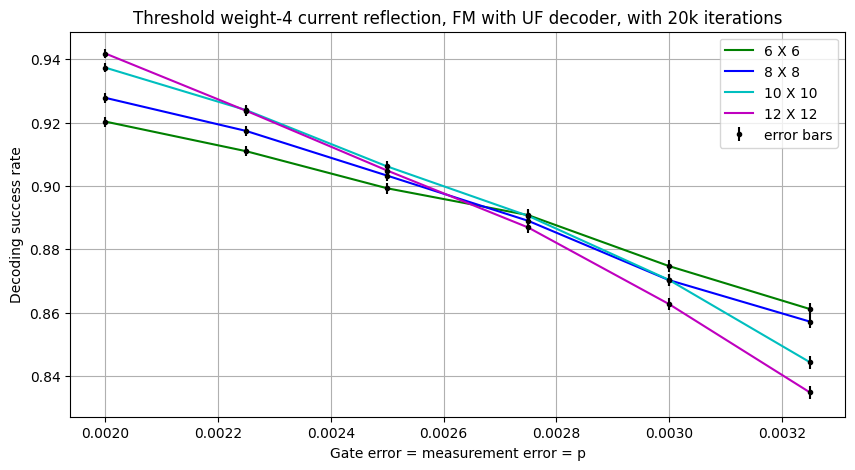

In [4]:
iterations = 30000

# first data first trial
# data = {"(6, 6)":{"0":[0.0005,0.9622],"1":[0.001,0.9507333333],"2":[0.00125,0.9457333333],"3":[0.0015,0.9362333333],"4":[0.00175,0.9285666667],"5":[0.002,0.9189]},"(8, 8)":{"0":[0.0005,0.9732333333],"1":[0.001,0.9631],"2":[0.00125,0.9567333333],"3":[0.0015,0.9478],"4":[0.00175,0.9414333333],"5":[0.002,0.9302666667]},"(10, 10)":{"0":[0.0005,0.9827666667],"1":[0.001,0.9741],"2":[0.00125,0.9667],"3":[0.0015,0.9563666667],"4":[0.00175,0.9476],"5":[0.002,0.9326666667]},"(12, 12)":{"0":[0.0005,0.9877333333],"1":[0.001,0.9787],"2":[0.00125,0.972],"3":[0.0015,0.9621],"4":[0.00175,0.9545666667],"5":[0.002,0.9400333333]}}
# second data better regime
data = {"(6, 6)":{"0":[0.002,0.9203],"1":[0.00225,0.9109333333],"2":[0.0025,0.8992333333],"3":[0.00275,0.8907666667],"4":[0.003,0.8746666667],"5":[0.00325,0.8611]},"(8, 8)":{"0":[0.002,0.9278],"1":[0.00225,0.9173333333],"2":[0.0025,0.9032333333],"3":[0.00275,0.8889666667],"4":[0.003,0.8702333333],"5":[0.00325,0.8571333333]},"(10, 10)":{"0":[0.002,0.9373333333],"1":[0.00225,0.9239],"2":[0.0025,0.9061333333],"3":[0.00275,0.8905333333],"4":[0.003,0.8703],"5":[0.00325,0.8443]},"(12, 12)":{"0":[0.002,0.9418],"1":[0.00225,0.9237],"2":[0.0025,0.9048333333],"3":[0.00275,0.8868666667],"4":[0.003,0.8626666667],"5":[0.00325,0.8347666667]}}

# WT3 data into wt4 just to test!
# data = {"(6, 6)":{"0":[0.0005,0.9951],"1":[0.001,0.9940666667],"2":[0.00125,0.9918333333],"3":[0.0015,0.9896666667],"4":[0.00175,0.9885],"5":[0.002,0.9857666667]},"(8, 8)":{"0":[0.0005,0.998],"1":[0.001,0.9972666667],"2":[0.00125,0.9962],"3":[0.0015,0.9959],"4":[0.00175,0.9943],"5":[0.002,0.9932666667]},"(10, 10)":{"0":[0.0005,0.9982333333],"1":[0.001,0.998],"2":[0.00125,0.9976],"3":[0.0015,0.9973],"4":[0.00175,0.9969333333],"5":[0.002,0.9958333333]},"(12, 12)":{"0":[0.0005,0.9982666667],"1":[0.001,0.9983],"2":[0.00125,0.9982666667],"3":[0.0015,0.9980333333],"4":[0.00175,0.9978],"5":[0.002,0.9974]}}
rates = [rate[0] for rate in list(data["(6, 6)"].values())]

l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=35000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4 current reflection, FM with UF decoder, with 20k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()

## Weight-4 CASES!

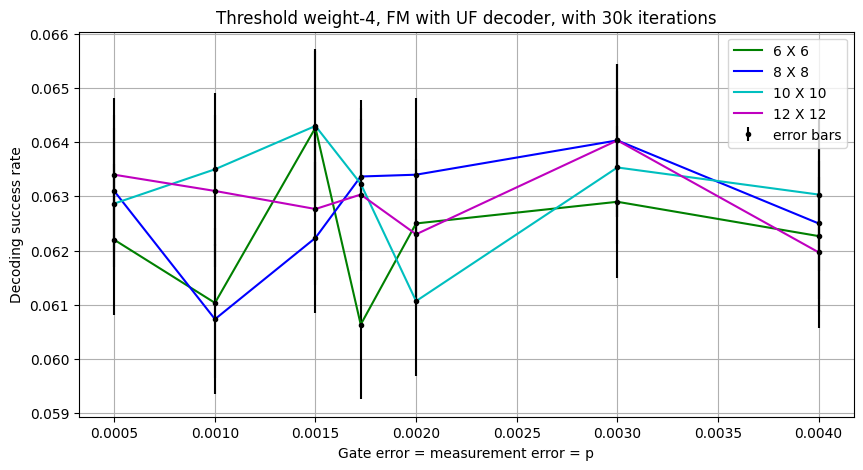

In [14]:
iterations = 30000

# first data first trial

# data = {"(6, 6)":{"0":[0.001001,0.9982],"1":[0.0015,0.9978666667],"2":[0.002,0.9968666667],"3":[0.0025,0.9954333333],"4":[0.003,0.9929],"5":[0.0035,0.9887],"6":[0.004,0.9837333333],"7":[0.005,0.9671333333]},"(8, 8)":{"0":[0.001001,0.9984],"1":[0.0015,0.9983666667],"2":[0.002,0.9981],"3":[0.0025,0.9976666667],"4":[0.003,0.9962333333],"5":[0.0035,0.9948],"6":[0.004,0.9919333333],"7":[0.005,0.9778]},"(10, 10)":{"0":[0.001001,0.9984],"1":[0.0015,0.9984],"2":[0.002,0.9984],"3":[0.0025,0.9981666667],"4":[0.003,0.9977666667],"5":[0.0035,0.9974333333],"6":[0.004,0.9954333333],"7":[0.005,0.9854333333]},"(12, 12)":{"0":[0.001001,0.9984],"1":[0.0015,0.9984],"2":[0.002,0.9984],"3":[0.0025,0.9983],"4":[0.003,0.9982666667],"5":[0.0035,0.9980333333],"6":[0.004,0.9971333333],"7":[0.005,0.9905]}}
# data = {"(6, 6)":{"0":[0.001001,0.9981666667],"1":[0.0015,0.9976666667],"2":[0.002,0.9965333333],"3":[0.0025,0.9951],"4":[0.003,0.9923333333],"5":[0.0035,0.9881333333],"6":[0.004,0.9831],"7":[0.005,0.9652333333],"8":[0.0055,0.9533],"9":[0.006,0.9351666667],"10":[0.0065,0.9179],"11":[0.007,0.8919666667],"12":[0.0075,0.8689],"13":[0.008,0.8391],"14":[0.0085,0.7994333333],"15":[0.009,0.7589],"16":[0.0095,0.7226666667],"17":[0.01,0.6849666667]},"(8, 8)":{"0":[0.001001,0.9984],"1":[0.0015,0.9984],"2":[0.002,0.9982333333],"3":[0.0025,0.9976333333],"4":[0.003,0.9965],"5":[0.0035,0.9943333333],"6":[0.004,0.9924333333],"7":[0.005,0.9796],"8":[0.0055,0.9643333333],"9":[0.006,0.9458],"10":[0.0065,0.9225333333],"11":[0.007,0.8971666667],"12":[0.0075,0.8565],"13":[0.008,0.8098333333],"14":[0.0085,0.7595333333],"15":[0.009,0.7087333333],"16":[0.0095,0.6447],"17":[0.01,0.5817666667]},"(10, 10)":{"0":[0.001001,0.9984],"1":[0.0015,0.9983666667],"2":[0.002,0.9984],"3":[0.0025,0.9983666667],"4":[0.003,0.9979],"5":[0.0035,0.9973666667],"6":[0.004,0.9958666667],"7":[0.005,0.986],"8":[0.0055,0.9747666667],"9":[0.006,0.9592666667],"10":[0.0065,0.9323666667],"11":[0.007,0.8953666667],"12":[0.0075,0.8539],"13":[0.008,0.7919],"14":[0.0085,0.7131333333],"15":[0.009,0.6425333333],"16":[0.0095,0.5541666667],"17":[0.01,0.4783666667]},"(12, 12)":{"0":[0.001001,0.9984],"1":[0.0015,0.9984],"2":[0.002,0.9983666667],"3":[0.0025,0.9983666667],"4":[0.003,0.9982],"5":[0.0035,0.9980666667],"6":[0.004,0.9971333333],"7":[0.005,0.9912666667],"8":[0.0055,0.982],"9":[0.006,0.9666333333],"10":[0.0065,0.9376],"11":[0.007,0.8970333333],"12":[0.0075,0.8372],"13":[0.008,0.7632666667],"14":[0.0085,0.6699],"15":[0.009,0.5689666667],"16":[0.0095,0.4763333333],"17":[0.01,0.3761]}}


# 71 first data
# data = {"(6, 6)":{"0":[0.0005,0.0644],"1":[0.001001,0.0622666667],"2":[0.002,0.0638333333],"3":[0.003,0.0613666667],"4":[0.004,0.0595666667],"5":[0.005,0.0636666667],"6":[0.006,0.0603333333],"7":[0.007,0.062],"8":[0.008,0.0599333333],"9":[0.009,0.0612666667]},"(8, 8)":{"0":[0.0005,0.0619666667],"1":[0.001001,0.0586666667],"2":[0.002,0.0635],"3":[0.003,0.0627666667],"4":[0.004,0.0617666667],"5":[0.005,0.0637333333],"6":[0.006,0.0642333333],"7":[0.007,0.0623],"8":[0.008,0.0596333333],"9":[0.009,0.0614333333]},"(10, 10)":{"0":[0.0005,0.0629666667],"1":[0.001001,0.0632],"2":[0.002,0.0618333333],"3":[0.003,0.0603333333],"4":[0.004,0.0615333333],"5":[0.005,0.0622],"6":[0.006,0.0618333333],"7":[0.007,0.0622333333],"8":[0.008,0.0628],"9":[0.009,0.0612]},"(12, 12)":{"0":[0.0005,0.0630333333],"1":[0.001001,0.0635],"2":[0.002,0.0630333333],"3":[0.003,0.0628333333],"4":[0.004,0.0626],"5":[0.005,0.0587666667],"6":[0.006,0.0636333333],"7":[0.007,0.0606],"8":[0.008,0.0613333333],"9":[0.009,0.0623666667]}}

# 72 first data
# data = {"(6, 6)":{"0":[0.0005,0.9952333333],"1":[0.001001,0.9923333333],"2":[0.002,0.9843],"3":[0.003,0.9685666667],"4":[0.004,0.9450666667],"5":[0.005,0.9085333333],"6":[0.006,0.8556333333],"7":[0.007,0.7963333333],"8":[0.008,0.7107333333],"9":[0.009,0.6309333333]},"(8, 8)":{"0":[0.0005,0.9975],"1":[0.001001,0.9968],"2":[0.002,0.9933333333],"3":[0.003,0.9814],"4":[0.004,0.9567666667],"5":[0.005,0.9124],"6":[0.006,0.8432],"7":[0.007,0.7451666667],"8":[0.008,0.6281],"9":[0.009,0.5137333333]},"(10, 10)":{"0":[0.0005,0.9980666667],"1":[0.001001,0.9977333333],"2":[0.002,0.9957333333],"3":[0.003,0.9875],"4":[0.004,0.9677],"5":[0.005,0.9182],"6":[0.006,0.8302333333],"7":[0.007,0.7005666667],"8":[0.008,0.5452666667],"9":[0.009,0.3933]},"(12, 12)":{"0":[0.0005,0.9983],"1":[0.001001,0.9982],"2":[0.002,0.9973333333],"3":[0.003,0.9929],"4":[0.004,0.9746333333],"5":[0.005,0.9218333333],"6":[0.006,0.8144],"7":[0.007,0.6523],"8":[0.008,0.4567333333],"9":[0.009,0.2928666667]}}

# 73 first data
# data = {"(6, 6)":{"0":[0.0005,0.0593333333],"1":[0.001001,0.0636333333],"2":[0.002,0.0611333333],"3":[0.003,0.0594333333],"4":[0.004,0.0645666667],"5":[0.005,0.0643],"6":[0.006,0.0622],"7":[0.007,0.0645333333],"8":[0.008,0.0628],"9":[0.009,0.0632333333]},"(8, 8)":{"0":[0.0005,0.0627],"1":[0.001001,0.0646333333],"2":[0.002,0.0616],"3":[0.003,0.0614333333],"4":[0.004,0.0612333333],"5":[0.005,0.0609],"6":[0.006,0.0596666667],"7":[0.007,0.0606666667],"8":[0.008,0.064],"9":[0.009,0.0615666667]},"(10, 10)":{"0":[0.0005,0.0600333333],"1":[0.001001,0.0643],"2":[0.002,0.0628],"3":[0.003,0.0629333333],"4":[0.004,0.0610333333],"5":[0.005,0.0613666667],"6":[0.006,0.062],"7":[0.007,0.0617],"8":[0.008,0.062],"9":[0.009,0.0615333333]},"(12, 12)":{"0":[0.0005,0.0620666667],"1":[0.001001,0.0611],"2":[0.002,0.0601666667],"3":[0.003,0.0629],"4":[0.004,0.0631333333],"5":[0.005,0.0631333333],"6":[0.006,0.0608333333],"7":[0.007,0.0634333333],"8":[0.008,0.0665333333],"9":[0.009,0.0644333333]}}

# 74 first data
# data = {"(6, 6)":{"0":[0.0005,0.8862666667],"1":[0.001001,0.8627],"2":[0.002,0.8075],"3":[0.003,0.7445666667],"4":[0.004,0.6752666667],"5":[0.005,0.5951333333],"6":[0.006,0.5215333333],"7":[0.007,0.4537666667],"8":[0.008,0.3833],"9":[0.009,0.3178666667]},"(8, 8)":{"0":[0.0005,0.8842],"1":[0.001001,0.8573666667],"2":[0.002,0.7749666667],"3":[0.003,0.6871],"4":[0.004,0.5817333333],"5":[0.005,0.4822],"6":[0.006,0.3823],"7":[0.007,0.2981],"8":[0.008,0.2338333333],"9":[0.009,0.1819333333]},"(10, 10)":{"0":[0.0005,0.8774333333],"1":[0.001001,0.8390333333],"2":[0.002,0.7375],"3":[0.003,0.6185333333],"4":[0.004,0.4887666667],"5":[0.005,0.3731666667],"6":[0.006,0.2759333333],"7":[0.007,0.2027],"8":[0.008,0.1541],"9":[0.009,0.1176]},"(12, 12)":{"0":[0.0005,0.8758],"1":[0.001001,0.8206],"2":[0.002,0.6953333333],"3":[0.003,0.5432333333],"4":[0.004,0.4034333333],"5":[0.005,0.2931333333],"6":[0.006,0.2026],"7":[0.007,0.1458],"8":[0.008,0.1096],"9":[0.009,0.0848]}}

# 50 first data
# data = {"(6, 6)":{"0":[0.0005,0.8866333333],"1":[0.001001,0.8628],"2":[0.002,0.8116],"3":[0.003,0.7458666667],"4":[0.004,0.6772],"5":[0.005,0.5966666667],"6":[0.006,0.5234333333],"7":[0.007,0.4492],"8":[0.008,0.3823333333],"9":[0.009,0.3236333333]},"(8, 8)":{"0":[0.0005,0.8809333333],"1":[0.001001,0.8503666667],"2":[0.002,0.7779333333],"3":[0.003,0.6814333333],"4":[0.004,0.5825333333],"5":[0.005,0.4808333333],"6":[0.006,0.3854],"7":[0.007,0.3013],"8":[0.008,0.2315333333],"9":[0.009,0.1849]},"(10, 10)":{"0":[0.0005,0.8780666667],"1":[0.001001,0.8376],"2":[0.002,0.7372],"3":[0.003,0.6239333333],"4":[0.004,0.4903333333],"5":[0.005,0.3723333333],"6":[0.006,0.2746333333],"7":[0.007,0.2052666667],"8":[0.008,0.1505666667],"9":[0.009,0.1127]},"(12, 12)":{"0":[0.0005,0.8744666667],"1":[0.001001,0.8212],"2":[0.002,0.6918],"3":[0.003,0.5423],"4":[0.004,0.3988666667],"5":[0.005,0.2869333333],"6":[0.006,0.2059666667],"7":[0.007,0.1438666667],"8":[0.008,0.1038],"9":[0.009,0.0854666667]}}

# 51 first data
# data = {"(6, 6)":{"0":[0.0005,0.0641],"1":[0.001001,0.0635333333],"2":[0.0015,0.0603],"3":[0.001725,0.0615333333],"4":[0.002,0.0641666667],"5":[0.003,0.0614333333],"6":[0.004,0.0625666667]},"(8, 8)":{"0":[0.0005,0.0613666667],"1":[0.001001,0.0637],"2":[0.0015,0.0622],"3":[0.001725,0.0611333333],"4":[0.002,0.0626666667],"5":[0.003,0.0605666667],"6":[0.004,0.0613]},"(10, 10)":{"0":[0.0005,0.0613],"1":[0.001001,0.0588666667],"2":[0.0015,0.0624333333],"3":[0.001725,0.0620333333],"4":[0.002,0.0635333333],"5":[0.003,0.0606333333],"6":[0.004,0.0639]},"(12, 12)":{"0":[0.0005,0.0631333333],"1":[0.001001,0.0625333333],"2":[0.0015,0.0616333333],"3":[0.001725,0.0594],"4":[0.002,0.0628],"5":[0.003,0.0631],"6":[0.004,0.0638666667]}}

# 52 first data
# data ={"(6, 6)":{"0":[0.0005,0.0991333333],"1":[0.001001,0.0906333333],"2":[0.0015,0.0905333333],"3":[0.001725,0.0869666667],"4":[0.002,0.0889333333],"5":[0.003,0.0815666667],"6":[0.004,0.0756333333]},"(8, 8)":{"0":[0.0005,0.0711666667],"1":[0.001001,0.0679],"2":[0.0015,0.0675666667],"3":[0.001725,0.0690333333],"4":[0.002,0.0663666667],"5":[0.003,0.0666],"6":[0.004,0.0665333333]},"(10, 10)":{"0":[0.0005,0.0634333333],"1":[0.001001,0.0625],"2":[0.0015,0.0617],"3":[0.001725,0.0628333333],"4":[0.002,0.0650333333],"5":[0.003,0.0626333333],"6":[0.004,0.0631333333]},"(12, 12)":{"0":[0.0005,0.0631666667],"1":[0.001001,0.0621],"2":[0.0015,0.0627333333],"3":[0.001725,0.0605666667],"4":[0.002,0.0612666667],"5":[0.003,0.0608333333],"6":[0.004,0.0623666667]}}

# 53 first data
# data = {"(6, 6)":{"0":[0.0005,0.0633333333],"1":[0.001001,0.0610666667],"2":[0.0015,0.0606],"3":[0.001725,0.0598333333],"4":[0.002,0.0636666667],"5":[0.003,0.0614333333],"6":[0.004,0.0636]},"(8, 8)":{"0":[0.0005,0.0625666667],"1":[0.001001,0.0623],"2":[0.0015,0.0639333333],"3":[0.001725,0.0624666667],"4":[0.002,0.0603],"5":[0.003,0.0611],"6":[0.004,0.0621666667]},"(10, 10)":{"0":[0.0005,0.0640333333],"1":[0.001001,0.0607666667],"2":[0.0015,0.061],"3":[0.001725,0.0603666667],"4":[0.002,0.0624333333],"5":[0.003,0.0628333333],"6":[0.004,0.0609666667]},"(12, 12)":{"0":[0.0005,0.0627666667],"1":[0.001001,0.0647666667],"2":[0.0015,0.0612333333],"3":[0.001725,0.0622666667],"4":[0.002,0.0633666667],"5":[0.003,0.0621],"6":[0.004,0.0635333333]}}

# 54 first data
data = {"(6, 6)":{"0":[0.0005,0.0622],"1":[0.001001,0.0610333333],"2":[0.0015,0.0642666667],"3":[0.001725,0.0606333333],"4":[0.002,0.0625],"5":[0.003,0.0629],"6":[0.004,0.0622666667]},"(8, 8)":{"0":[0.0005,0.0631],"1":[0.001001,0.0607333333],"2":[0.0015,0.0622333333],"3":[0.001725,0.0633666667],"4":[0.002,0.0634],"5":[0.003,0.0640333333],"6":[0.004,0.0625]},"(10, 10)":{"0":[0.0005,0.0628666667],"1":[0.001001,0.0635],"2":[0.0015,0.0643],"3":[0.001725,0.0632333333],"4":[0.002,0.0610666667],"5":[0.003,0.0635333333],"6":[0.004,0.0630333333]},"(12, 12)":{"0":[0.0005,0.0634],"1":[0.001001,0.0631],"2":[0.0015,0.0627666667],"3":[0.001725,0.0630333333],"4":[0.002,0.0623],"5":[0.003,0.0640333333],"6":[0.004,0.0619666667]}}

rates = [rate[0] for rate in list(data["(6, 6)"].values())]
l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=350000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4, FM with UF decoder, with 30k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()

## Weight-4 Cavity Carving Coherent Near Future

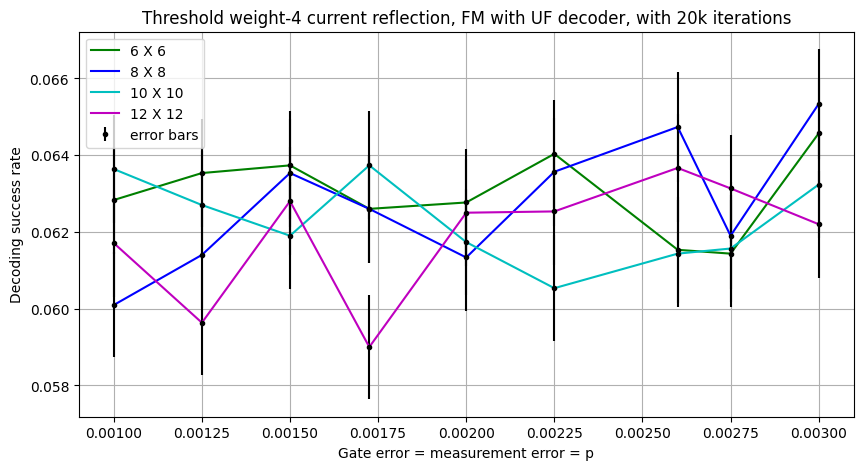

In [27]:
iterations = 30000

# first data first trial


data = {"(6, 6)":{"0":[0.001001,0.0628333333],"1":[0.00125,0.0635333333],"2":[0.0015,0.0637333333],"3":[0.001725,0.0626],"4":[0.002,0.0627666667],"5":[0.00225,0.0640333333],"6":[0.0026,0.0615333333],"7":[0.00275,0.0614333333],"8":[0.003,0.0645666667]},"(8, 8)":{"0":[0.001001,0.0601],"1":[0.00125,0.0614],"2":[0.0015,0.0635333333],"3":[0.001725,0.0626],"4":[0.002,0.0613333333],"5":[0.00225,0.0635666667],"6":[0.0026,0.0647333333],"7":[0.00275,0.0619],"8":[0.003,0.0653333333]},"(10, 10)":{"0":[0.001001,0.0636333333],"1":[0.00125,0.0627],"2":[0.0015,0.0619],"3":[0.001725,0.0637333333],"4":[0.002,0.0617333333],"5":[0.00225,0.0605333333],"6":[0.0026,0.0614333333],"7":[0.00275,0.0615666667],"8":[0.003,0.0632333333]},"(12, 12)":{"0":[0.001001,0.0617],"1":[0.00125,0.0596333333],"2":[0.0015,0.0628],"3":[0.001725,0.059],"4":[0.002,0.0625],"5":[0.00225,0.0625333333],"6":[0.0026,0.0636666667],"7":[0.00275,0.0631333333],"8":[0.003,0.0622]}}
rates = [rate[0] for rate in list(data["(6, 6)"].values())]

l6 = [rate[1] for rate in list(data["(6, 6)"].values())]
l8 = [rate[1] for rate in list(data["(8, 8)"].values())]
l10 = [rate[1] for rate in list(data["(10, 10)"].values())]
l12 = [rate[1] for rate in list(data["(12, 12)"].values())]


# Fitting function
def fitting_function(x, a0, a1, a2, mu, pth):
    return a0+a1*(x-pth)*(8**(1/mu))+a2*((x-pth)**2)*(8**(2/mu))

# Error function
def err(x):
    return math.sqrt((x**2 * (1-x) + x * (1-x)**2 )/iterations)


error= [[err(x) for x in l] for l in [l6, l8,  l10, l12]]

rng = np.random.default_rng()

pop =[curve_fit(fitting_function, rates, code, maxfev=350000) for code in [l6, l8, l10, l12]]


fig = plt.figure(figsize=(10,5))
fig.set_facecolor("w")
ax1 = fig.add_subplot()
ax1.set_title('Threshold weight-4 current reflection, FM with UF decoder, with 20k iterations')
ax1.set_ylabel('Decoding success rate')
ax1.set_xlabel('Gate error = measurement error = p')
plt.grid()


plt.errorbar(rates,l6,yerr=error[0], fmt='k.')
plt.errorbar(rates,l8,yerr=error[1], fmt='k.')
plt.errorbar(rates,l10,yerr=error[2], fmt='k.')
plt.errorbar(rates,l12,yerr=error[3], fmt='k.')


# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[0][0][0],pop[0][0][1],pop[0][0][2],pop[0][0][3],pop[0][0][4]),'r-', label='l6_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[1][0][0],pop[1][0][1],pop[1][0][2],pop[1][0][3],pop[1][0][4]),'g-', label='l8_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[2][0][0],pop[2][0][1],pop[2][0][2],pop[2][0][3],pop[2][0][4]),'b-', label='l10_fit')
# plt.plot(np.linspace(rates[0]-0.0001, rates[-1]+0.0001, 100),fitting_function(np.linspace(rates[0]+0.0001, rates[-1]+0.0001, 100),pop[3][0][0],pop[3][0][1],pop[3][0][2],pop[3][0][3],pop[3][0][4]),'c-', label='l12_fit')


plt.plot(rates,l6,'g-', label='l6_fit')
plt.plot(rates,l8,'b-', label='l8_fit')
plt.plot(rates,l10,'c-', label='l10_fit')
plt.plot(rates,l12,'m-', label='l12_fit')


plt.legend(['6 X 6', '8 X 8','10 X 10','12 X 12', 'error bars'])

# plt.savefig('Weight_4_reflection_current_threshold.pdf')
plt.show()